# **MAIA Survey Data Analysis**



In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
#Read the MAIA csv file
df = pd.read_csv('maia_data_copy.csv')

shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])

#Print the first 5 rows of the df
df.head()



DataFrame Shape : (266, 69)

Number of rows : 266

Number of columns : 69


,Progress,ResponseId,Q1,Q2,Q3,Q4,Q4_6_TEXT,Q5,Q6,Q7,...,Q29,Q29_6_TEXT,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q36_7_TEXT
0,100,R_3gZ7aApg5ysFqf8,Yes,Yes,"Yes, I am currently using it",NaN,NaN,NaN,No,Other:,...,Leadership/strategic,NaN,5-10 years,Cambodia,Capital city,31-50,£100 000 - £1 000 000 (€117 000 - €1 171 000; ...,< 20 000,Other (please define):,Monetary and Economic History
1,100,R_Us8dd0u8MtesCHf,Yes,Yes,"No, I am not","Too expensive,Lack of staff,Lack of skills/tra...",NaN,Yes,I do not know,NaN,...,Leadership/strategic,NaN,> 15 years,Croatia,Capital city,31-50,£1 000 000 - £5 000 000 (€1 171 000 - €5 852 0...,< 20 000,Ethnography,NaN
2,100,R_12EIR7qN1jaSgpl,Yes,Yes,"Yes, I am currently using it",NaN,NaN,NaN,I do not know,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,R_8zVbFGd4kxIMw7v,Yes,Yes,"Yes, I am currently using it",NaN,NaN,NaN,"Yes, internal,Yes, external",NaN,...,Curatorial,NaN,> 15 years,United Kingdom of Great Britain and Northern I...,Capital city,> 200,> £5 000 000 (> €5 852 000; > $7 000 000),I do not know,Universal (holding a significant amount of var...,NaN
4,100,R_3iy6fcVREMEHWMo,Yes,Yes,"No, I am not",Too expensive,NaN,Yes,I do not know,NaN,...,Other (please describe):,Supervising and control of urban excavations t...,1-4 years,Turkey,Urban,31-50,I do not know,< 1 000 000,Other (please define):,Archaeology


In [113]:
#Calculate number of responses
responses = (df.shape[0])
print(responses)

266


In [114]:
#Print the number of complete responses
print(sum(df['Progress'] == 100))


141


### Q3: Are you using Artifical Intelligence (AI) applications for your work? 

In [115]:
#Count all answers and list them descending
df['Q3'].value_counts(sort=True)

No, I am not                                189
Yes, I am currently using it                 49
I intend to use it in the next 12 months     17
Used it in the past                          11
Name: Q3, dtype: int64

In [116]:
#Display how many particpants haven't given an answer
count = df["Q3"].isna().sum()
print(count, "participants have not answered.")

0 participants have not answered.


In [117]:
#Normalise the count to represent answers in percent
df['Q3'].value_counts(sort=True, normalize=True) * 100

No, I am not                                71.052632
Yes, I am currently using it                18.421053
I intend to use it in the next 12 months     6.390977
Used it in the past                          4.135338
Name: Q3, dtype: float64

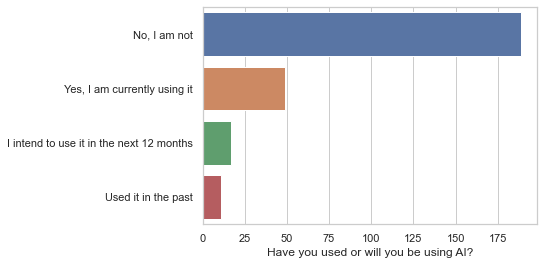

In [118]:
#Plot question three as a bar plot
sns.set_theme(style="whitegrid")

#df_q3 = pd.read_csv('maia_data_copy.csv', usecols=['Q3'])
countplot = sns.countplot(data=df, y="Q3", order = df['Q3'].value_counts().index)
#countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, ha="right")
countplot.set(xlabel="Have you used or will you be using AI?", ylabel="")

plt.show()

### Q4: Can you tell us the main reasons why you have not used AI applications so far? (Q4 displayed when Q3 'No, I am not' selected)

In [216]:
#Create dummies for each comma separated string value and sum them up
p = df['Q4'].str.get_dummies(sep=',').sum()
print(p)

Lack of skills/training    100
Lack of staff               45
Missing technology          61
No need                     55
Other:                      17
Too expensive               60
dtype: int64


In [218]:
#Nomrmalise the count and display percentages
['p'].value_counts(sort=True, normalize=True) * 100

AttributeError: 'list' object has no attribute 'value_counts'

In [120]:
#Display how many particpants haven't given an answer
count = df["Q4"].isna().sum()
print(count, "participants have not answered.")

88 participants have not answered.


### Q5: Are you personally interested in using AI for your work? (Q5 displayed when Q3 'No, I am not' selected)

In [121]:
#Count answers given
df['Q5'].value_counts(sort=True)

Not really sure    80
Yes                68
No                 16
I do not know      11
Name: Q5, dtype: int64

In [122]:
#Print number of participants who have not answered this question
count = df["Q5"].isna().sum()
print(count, "participants have not answered.")

91 participants have not answered.


In [123]:
#Normalise and print percentage
df['Q5'].value_counts(sort=True, normalize=True) * 100

Not really sure    45.714286
Yes                38.857143
No                  9.142857
I do not know       6.285714
Name: Q5, dtype: float64

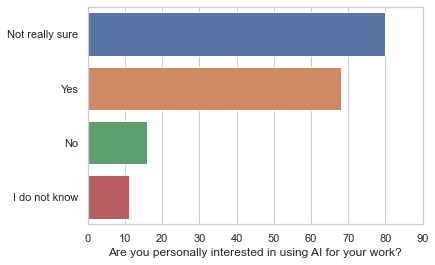

In [124]:
#Plot Q5
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q5", order = df['Q5'].value_counts().index)

countplot.set(xlabel="Are you personally interested in using AI for your work?", ylabel="", xlim=(0,90))

plt.show()

### Q6: Is someone else/an external partner using AI applications at the institution you are working for?

In [125]:
#Count number of answers given and sort them
df['Q6'].value_counts(sort=True)

No                             106
I do not know                   80
Yes, internal                   25
Yes, external                   21
Yes, internal,Yes, external     10
Name: Q6, dtype: int64

In [126]:
#Count how many participants have not answered this question
count = df["Q6"].isna().sum()
print(count, "participants have not answered.")

24 participants have not answered.


In [127]:
#Nomrmalise the count and display percentages
df['Q6'].value_counts(sort=True, normalize=True) * 100

No                             43.801653
I do not know                  33.057851
Yes, internal                  10.330579
Yes, external                   8.677686
Yes, internal,Yes, external     4.132231
Name: Q6, dtype: float64

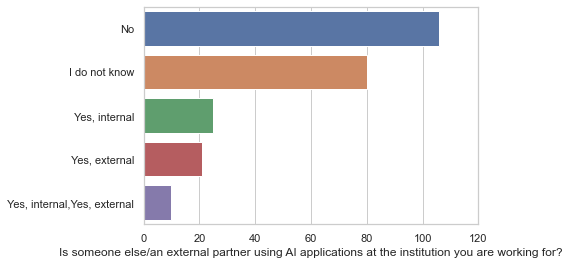

In [128]:
#Plot Q6
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q6", order = df['Q6'].value_counts().index)

countplot.set(xlabel="Is someone else/an external partner using AI applications at the institution you are working for?", ylabel="", xlim=(0,120))

plt.show()

### Q7: Can you tell us why someone else in your institution/externals might not have used AI so far? (Q7 displayed when Q6 "No" is selcted.)

In [129]:
#Create dummie variables for the strings and sum them up
df['Q7'].str.get_dummies(sep=',').sum()

Lack of skills/training    54
Lack of staff              33
Missing technology         43
No need                    28
Other:                     13
Too expensive              40
dtype: int64

In [130]:
#Count how many participants have not answered the question
count = df["Q7"].isna().sum()
print(count, "participants have not answered.")

161 participants have not answered.


**Other** includes: We are a very small institutions, Insufficient information on how it might be used in our particular museum, Probably lack of awareness of what may be possible, It isn't something that we feel is missing from what we offer our visitors, awareness, Unaware of what it might offer, Lack of understanding of AI as an interpretive tool

### Q8: Please describe how you or someone else are using/will use AI in your institution and tell us about the areas of application (e.g., computer vision, classification, visitor metrics, clustering, technical art history, production of exhibits etc.)

**Free text answers:** Using AI to improve visitors' experience through interactive tools that enables them to imporve their knowledge of the exhibited topics; computer vision, nlp, classification, human computation, computational linguistic analysis, visualisations, crowdsourcing; Image recognition and keyword suggestions for digital collections findability; computer vision to generate metadata about digitized analogue photographs of artwork; computer vision applications primarily; sharing our data in semantic form, precise uses for it are still to be determined / in the hands of other people in the institution; used by wider council for filtering and responding to customer enquiries, not used by the museum service; we work with bristol university computer sciences department on yearly projects. a recent application was looking at ocr for handwritten documents; internally:  image classification (collection items/ specimens) as part of specimen data refinery/ digitisation work. externally; used by a security vendor for analysing website traffic and network traffic; production of exhibits; image database sorting based on computer vision; visitor metrics, clustering, iconography; image detection from user photos in museum games, tensor flow, and for similarity analysis of user photos to emotions and museum objects; heritage connector project: using the outputs of ner and nel models in the form of a knowledge graph. these will make their way to being experimental widgets on the collection website; visitor metrics, production of exhibits; computer vision, classifacition, visitor metrics; computer vision; developed a machine learning pipeline for the  analysis of collections related text, for entity recognition, vocabulary and ontology building and looking for decoloniosation effort such as bias identification and source community terminology building; museum is part of a university that has department experimenting with AI; production of exhibits on multimedia screen; computer vision to tag images, for an internal-use-only search function to help find relevant content; using linked data to connect collections, term extraction from large amounts of texts, visitor metric analysis; visitor metrics and production of exhibits and enhancing interpretation and access; a project that used the transkribus software to automatically transcribe the handwriting of ik brunel; will be experimenting with ai services to enhance collection data and investigate ai and collections user engagement; production of exhibits, vr/ar technology; interactive exhibition generating graphics based on google searches; text mining, read aloud; geographic information systems, crs, modelling, photogrammetry; potential development of temporary displays; museum and in a computer vision research group that works with museums; computer vision; i am a data scientist / machine learning engineer. we use machine learning to enrich our catalogue so that users can more easily search, explore, and discover more things in the collection. we use a lot of computer vision, natural language processing, clustering/similarity calculation, among other techniques; computer vision and natural language parsing; image analysis; interpretation of movement for a interactive exhibit; computer vision, classification, clustering, gan; art historical research: data mining, face recognition through machine learning, transcription through machine learning, data mining; I use AI in some of my work in geographic information systems, including the use of natural language processing for determining coordinate locations for collections having only descriptive locations; image segmentation and processing; visualizing paintings; computer vision; recommender system including clustering, classification and computer vision; ai for toolsets created to connect with the collection, artlensai: share your view is a reverse image search tool that uses ai to match your images to artworks from the cleveland museum of art's collection.  artlens for slack  lets you and your co-workers curate a new exhibition, unique to your company every monday and friday, while enriching your remote workplace .We also use ai for our collection online search and our custom created collection system - both use assure search;  ai for creating activities for target groups around the exhibition; creation of an individual route in the museum based on what the visitor likes; using it to add metadata to digitised collections and archive material; using cloud based speech to text to transcribe media for exhibits; ai-based video enhancement to bring exhibit videos up to more modern quality standards; computer vision; user metrics for apps and online offereings; computer vision

### Q9: You have indicated that you or the institution you are working for have been using AI techniques. Was that:

In [131]:
#Count answers given
df['Q9'].value_counts(sort=True)

On a project basis         29
A long-term integration    20
Just a trial               11
I do not know               4
Name: Q9, dtype: int64

In [132]:
#Count number of participants who have not answered the question
count = df["Q9"].isna().sum()
print(count, "participants have not answered.")

202 participants have not answered.


In [133]:
#Normalise and print percentage
df['Q9'].value_counts(sort=True, normalize=True) * 100

On a project basis         45.3125
A long-term integration    31.2500
Just a trial               17.1875
I do not know               6.2500
Name: Q9, dtype: float64

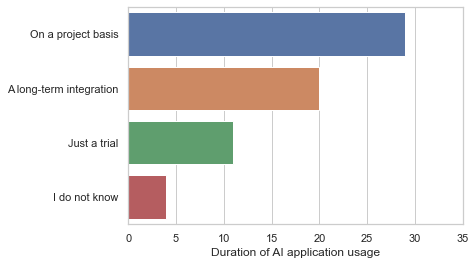

In [134]:
#Plot Q9
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q9", order = df['Q9'].value_counts().index)

countplot.set(xlabel="Duration of AI application usage", ylabel="", xlim=(0,35))

plt.show()

### Q10: Was your experience working with AI positive or negative? Please explain:

In [135]:
#Count number of participants who have not answered the question
count = df["Q10"].isna().sum()
print(count, "participants have not answered.")

209 participants have not answered.


**Answers given:** 

**Positive (38):** it helps to improve visitors' experience through by contextualizing the exhibition;  i think the academic folk underestimate how much data cleaning is required beforehand and how much interpretation is required afterwards when working with historical data so they probably had some culture shock; positive with some caveats in understanding the output; positive, though didnt result in a usable product for now; positive, but it highlights the learning curve needed to embrace ai and to understand different types of ai, the skills and tooling needed; it created a better user experience; it was a research project which has proven successful; very much helps for working; showed collections from new perspective; positives were that the pipeline worked; some help for explaining exhibition; positive, with a caveat: it helped to do work which would otherwise be too much for people to do. but the results do need to be checked and interpreted. logical, but it's important to keep in mind ai is not a magic wand, it's a toolbelt in which each tool has flaws; positive although quite challenging with loads of learning curves; well received by audiences; visitors seemed to have fun with joining the project, and it was easy for project organizers to analyze the data; it allows for greater data research and the integration of several factor. portability and easy access are positive notes as well; my research group role has a number of collaborations - almost all have been positive, particularly those where there is an immediately realisable benefit in terms of collections management or description; very positive. using ml to infer features allows us to infer features about works in the collection (and similarities between them) makes it more connected, accessible, and interpretable as a whole. with a good technical foundation/platform, it's as easy to integrate as any other new technology; It was quite positive, i'm looking forward to integrating new ai projects; positive although it is perhaps a little overkill at the moment; positive but needs better batch processing; positive: interesting outcomes; using it for search has made our collection search powerful as well as the toolsets have increased engagement around the world.  we also use it in a game in our museum's artlens gallery where people look at artwork and make an expression.  that was one of our first ai uses and is not as powerful; my experience in using AI is super positive. i can plan routes according to visitors profiles; it was interesting and very new for our museum; yes postive, but we only got to a certain point - as part of the microsoft ai for good hack - and then all the team had to return to there day jobs; positive. We are looking into simple ai workflows that may save us money but crucially are able to be picked up by the current staff base without requiring specialist knowledge. i am myself employed on a project basis and when that finished they need a legacy not heavily reliant on a specialist skill set; positive. it's not a silver bullet, but when it works properly, it can seem like magic; it is somewhat helpful, but does not replace the need for evaluation <br>
**Neutral (7):** The experimental results are exciting but the challenges of executing any of this work on a large scale are massive and frustrating; like many new technologies there were positives and negatives. the positives were that the pipeline worked. the negative was that it will take a lot more work to make it a standard tool we can easily re-use; mixed. we only use it internally because of issues with accuracy and mis-tagging, and concerns around ethics. in general it has been an interesting and helpful though; i'd classify it as neutral, really. most of our work was in classification and machine vision, but our collections are so diverse that the classifications didn't glean anything significantly useful; neutral, it has been very successful for facial recognition, particularly of our donors. its assigning of gender however is very problematic. it is also not good at assigning tags to contemporary art but for a lay person searching it works fine; <br>
**Negative (4):** negative, image recognition did a poor job of suggesting relevant keywords for non literal or non figurative artworks; negative, because it was far from creativity. the team had not fully assimilated the objects; the outcome was more interesting for the technical researchers than for the museum

### Q11: Would you describe the application as successful?

In [136]:
#Count aswers and display sorted
df['Q11'].value_counts(sort=True)

Yes              38
I do not know    12
No                3
Name: Q11, dtype: int64

In [137]:
#Count number of participants who have not answered the question
count = df["Q11"].isna().sum()
print(count, "participants have not answered.")

213 participants have not answered.


In [138]:
#Normalise and print percentage
df['Q11'].value_counts(sort=True, normalize=True) * 100

Yes              71.698113
I do not know    22.641509
No                5.660377
Name: Q11, dtype: float64

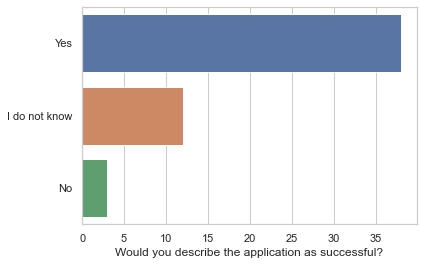

In [139]:
#Plot Q11
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q11", order = df['Q11'].value_counts().index)

countplot.set(xlabel="Would you describe the application as successful?", ylabel="")

plt.show()

### Q12: If it was sucessful, do you still use the application?

In [140]:
#Count answers and sort descending
df['Q12'].value_counts(sort=True)

Yes          22
Sometimes     8
No            8
Name: Q12, dtype: int64

In [141]:
#Count number of participants who have not answered the question
count = df["Q12"].isna().sum()
print(count, "participants have not answered.")

228 participants have not answered.


In [142]:
#Normalise and display percentage
df['Q12'].value_counts(sort=True, normalize=True) * 100

Yes          57.894737
Sometimes    21.052632
No           21.052632
Name: Q12, dtype: float64

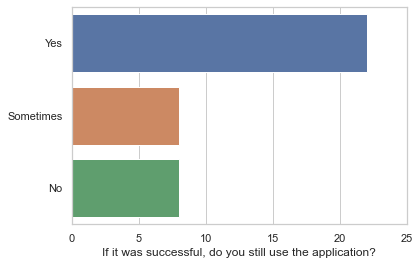

In [143]:
#Plot Q12
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q12", order = df['Q12'].value_counts().index)

countplot.set(xlabel="If it was successful, do you still use the application?", ylabel="", xlim=(0,25))

plt.show()

### Q13: Why did you stop using the application? (Q13 displayed if Q12 'No' selected)

In [144]:
#Count number of participants who have not answered the question
count = df["Q13"].isna().sum()
print(count, "participants have not answered.")

259 participants have not answered.


**Answers given:** not successful; ended after project duration; a charge was introduced which we couldn't meet; i took a different position and no longer worked with that application. i left the source code for my successor, though; no interesting results yet; no need; not complete

### Q14: If you have worked on an application with a partner (e.g., university, other museums, freelancer) would you describe the collaboration as positive or negative? Please give reasons.

In [145]:
#Count number of participants who have not answered the question
count = df["Q14"].isna().sum()
print(count, "participants have not answered.")

232 participants have not answered.


**Positive (27):** positive but also necessary in order to bring in the technical expertise; we wouldn't have internal resources or expertise to do the same work, and we're coming up with novel and useful research questions / applications; as a student the partner had more leeway/time to experiment; it was very positive due to the combination of skills in the project teams and the novel approach to problem solving; shared knowledge; positive as it involved external partners with an innovative access to our museum content; technical application was pretty easy and straight forward; positive because easy to reach some knowledge; positive. we worked with the University of Sheffield (using their gate tool) and also with our middleware suppliers (knowledge integration) who embedded the pipeline in our web data processing; positive. we collaborated with eu project partners who were all knowledgable in their field; with a partner yes, positive. quite hard to perceive the final results, but once it became more clear it was easier to understand what was required; positive - we had a lot of support; discussion went smoothly with analytical data by ai; positive, as the integration of computer based analysis and data management through gis is still in its nascent, therefore it was an open discussion on how to best adapt tools and systems to our projects; the collaborations have been positive for the research group in terms of validating methods and demonstrating impact of epsrc-funded research, while for museum collaborators they have created value in terms of improved collections management and description; very positive. artists have used the collection (and its ml-enriched features) to produce some really beautiful results. data science/digital humanities students have used some of the problems we've tackled as msc projects, and produced novel, innovative work. academic researchers have used the collection (or subsections of it) as the foundation for applied-ml research; helps u to resolve other technical issues which are hard if you don't have a technical degree; it helps you expand your scope by collaborating with interdisciplinary professionals and researchers; for artlens ai we worked with an interactive designer. we created this for pandemic and people use it still daily . Partnership was great. However, our inhouse team led the project; we are working with assetbank. they are a great vendor; we worked with a specialist contractor. It has been positive- they supply expertise that we do not have ( or at this point, require) from our regular staff. we have a support contract with them, so once the initial projects were set up, they continued tech support etc.; <br>
**Negative (3):** one negative to mention then, is the continuing cost of using these programs. We need to justify this financially on an ongoing basis; because it was far from creativity. it was very ordinary; dams vendor, negative as it was a plug in license without any training capability

### Q15: Do you think AI applications can enhance the visitor experience on-site?

In [146]:
#Count and sort the answers
df['Q15'].value_counts(sort=True)

Yes                       77
Probably in the future    77
I do not know             44
No                         4
Name: Q15, dtype: int64

In [147]:
#Count number of participants who have not answered the question
count = df["Q15"].isna().sum()
print(count, "participants have not answered.")

64 participants have not answered.


In [148]:
#Normalise and calculate percentage
df['Q15'].value_counts(sort=True, normalize=True) * 100

Yes                       38.118812
Probably in the future    38.118812
I do not know             21.782178
No                         1.980198
Name: Q15, dtype: float64

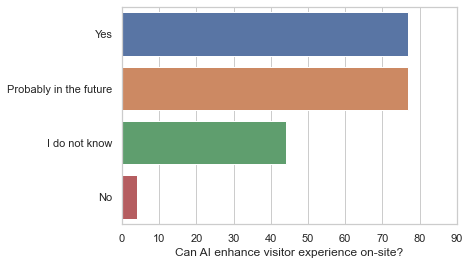

In [149]:
#Plot Q15
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q15", order = df['Q15'].value_counts().index)

countplot.set(xlabel="Can AI enhance visitor experience on-site?", ylabel="", xlim=(0,90))
#sns.despine(trim=True)


plt.show()

### Q37 (question order changed due to block arrangement in survey): Do you think AI applications can enhance the user experience of museum content online?

In [150]:
#Count answers and sort
df['Q37'].value_counts(sort=True)

Yes                       121
Probably in the future     50
I do not know              31
No                          4
Name: Q37, dtype: int64

In [151]:
#Count number of participants who have not answered the question
count = df["Q37"].isna().sum()
print(count, "participants have not answered.")

60 participants have not answered.


In [152]:
#Normalise and calculate percentage
df['Q37'].value_counts(sort=True, normalize=True) * 100

Yes                       58.737864
Probably in the future    24.271845
I do not know             15.048544
No                         1.941748
Name: Q37, dtype: float64

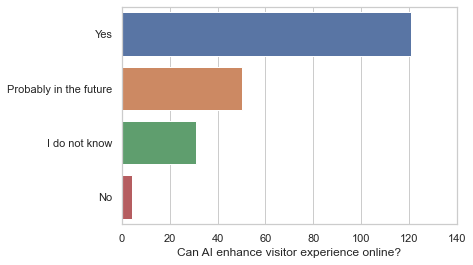

In [153]:
#Plot Q37
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q37", order = df['Q37'].value_counts().index)

countplot.set(xlabel="Can AI enhance visitor experience online?", ylabel="", xlim=(0,140))
#sns.despine(trim=True)


plt.show()

### Q16: Do you think the current digital capacity of your institution is sufficient to tackle the challenges of the future?

In [154]:
#Count answers and sort descending
df['Q16'].value_counts(sort=True)

No                                89
Partially, needs major updates    70
Mostly, needs minor updates       23
Yes, it is                        12
I do not know                      9
Name: Q16, dtype: int64

In [155]:
#Count number of participants who have not answered the question
count = df["Q16"].isna().sum()
print(count, "participants have not answered.")

63 participants have not answered.


In [156]:
df['Q16'].value_counts(sort=True, normalize=True) * 100

No                                43.842365
Partially, needs major updates    34.482759
Mostly, needs minor updates       11.330049
Yes, it is                         5.911330
I do not know                      4.433498
Name: Q16, dtype: float64

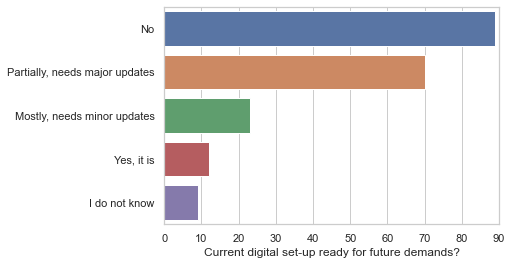

In [157]:
#Plot Q16
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q16", order = df['Q16'].value_counts().index)

countplot.set(xlabel="Current digital set-up ready for future demands?", ylabel="", xlim=(0,90))
#sns.despine(trim=True)


plt.show()

### Q17: What type of software are you using to store, modify, and query information about the collections you are working with?

**Free text answers:** we have created dedicated apps (developed by our partners and suppliers); we have a special programme provided by external supplier; azure, colab, notebooks, python, sql databases, file systems, excel, open refine, zooniverse; web based application called mues (acronym for  museum national inventory system) is used nationwide (all state museums) in order to make inventory of all artifacts in the museums; local software; the museum system; google drive; dams, cms; gallery systems tms, sql, elasticsearch, rest api, aws s3; internal database; modes; collection, archiver, and library management systems, dams, bespoke databases, report-writing software, hand-written integrations, middleware; mimsy, ms office; modes; ibase; emu; emu for collections mgmt database, ibm cloud object store for storage, power bi for reporting/ visualisation of digitisation/ collections management information; modes for museums; museums-specific cms, also various excel spreadsheets; i do not know exactly, but it seems insufficient; salesforce, microsoft word and microsoft excel; axiell; museum+, custom db; cms atom; not applicable (very small collection yet); do not have such software; system set up by the university of manchester via the website and a collection management software emu; office; mues (software of the ministry); mimsy xg (an oracle sql based database) and a wiki (dokuwiki). we translate all our data and text into json and elasticsearch; mimsy; modes; tms, emuseum, custom built applications further up the stack; json, sparql, textrazor, airtable, google spreadsheets, collections systems etc; adlib; modes; own database backup, administration cloud; collection management system (app layer adlib, database ms sql server), collections information integration middleware (ciim); very outdated version of a programme bought ca 10 years ago; museum information system (software owned and developed by the national heritage board of estonia); muis; for now, we've been trying to use different types of software including free ones, and still not yet decided; arcgis; ms excel; google business suite, ms office; file; long-life and user-centered data management systems; emu; numerous in-house developed algorithms (cnns, python toolkits such as opencv), sql databases; mimsy xg; axiell calm; elasticsearch, various aws storage solutions, azure as redundancy storage; ke emu; adlib; modes; collection database, basic boolean queries; pastperfect; embark; modes; qi platform by keepthinking; tms; specify; filemaker; the gallery system; sql database; axiell collections cms; emu; internal synology nas, past perfect software, custom built software; modes; modes; filemaker; modes; excel; cms; emu; tracks; several different data silos, including cms, dams, catalogs, spreadsheets, and everything in between; omeka; adlib; access;lightroom;oracle, toad,coldfusion. ma access; filemaker pro; microsoft; mimsy xg; modes; transcription, translation, image recognition, page fragmentation; modes; emu, arcgis, geolocate; content dm; calm; excel; excel; limis; database; museum index+, collections index +; mimsy xg; sarpur.is; adlib; adlib; assure search; cms; sql server; rather limited cms; adlib; excel; modes; local russian software kamis; muse.run; mimsy xg; in-house developed cms; we are developing in house our own tools based on open source technologies; filemaker; cms - axiells emuu, data occassionally exported as csv then reimported, where more practical for data-work; basic microsoft software; modes complete db running on windows 10; imdas; modes complete; modes; ria; modes; adlib; mimsy; ehive; ninox database; spreadsheets; vernon; modes complete; cms; cms, middleware content aggregator, website, touchscreens, database with other integration, ke emu; cms; adlib and calm; pre-packaged database for collections (artifacts, manuscripts, photographs); tms; mimsy xg; i don't manage collections but each dept with collections here uses a different platform: herbarium, historic objects, archives, library, and live plant collections; adlib; assetbank; tms, web based cms, other onsite dams

In [158]:
#Count number of participants who have not answered the question
count = df["Q17"].isna().sum()
print(count, "participants have not answered.")

109 participants have not answered.


### Q18: Do you think the software aforementioned is suitable for your work? I.e. do you find it easy to store and find relevant information about the collection.

In [159]:
#Q18
df['Q18'].value_counts(sort=True)

Yes                                                                               66
I can do my work, but there are shortfalls/things to improve. Please describe:    47
I do not know                                                                     38
No                                                                                28
Name: Q18, dtype: int64

**Please describe:** we develop a new app for each new experience so it demands a lot of work; working with collections at scale becomes expensive in a cloud-based system. copyright complicates access; cross querying databases is currently not possible; this is a massive question. there are shortcomings in nearly all major collection / library / archive management systems and dams; and unmanaged direct queries into source systems are not sustainable; we are considering an upgrade as there are insufficient fields and it's not particularly user friendly; user experience is shitty; it's not my  expertise but what i hear is that there are always updates to be done and language system problems with the updating. moreover, depending on the programs we participate in, all data has be to entered each time; needs updates and open access to all curators. currently only one staff member does all the work on the programme; the search facility is limited and inflexible for the lay user; public interface is better than for staff; there is no integration between ai and collections management or digital asset management software, and vendors are reluctant to implement it without support; not suitable for museum collection. suitable for archive collection but not museums; very difficult for non-specialists to find correct information; shortfalls are often related to the quality of our own data; out of date and not very user friendly, doesn't have a public face; not a good cloud solution and need to be able to access from remote locations; incredibly dated, not intuitive and not fit for the modern museum; lack of developer resource to improve inhouse databases and apps; see previous comment on batch processing; it's not created for art info mgmt; system is clunky and awkward; data inputted requires editing; software is generally outdated; insufficiently searchable, not available for public interogation, limited storage; search functions are limited and quirky. producing tailored output is difficult as we are limited to what the application allows. bespoke outputs can be designed for us but they have a cost that is beyond our means; ability to upload certain types of supporting information; lack of digital literacy in an organsiation; searching could be easier, it would be good to be able to embed more digital content in records; consistency of data entry is a hindrance to universal accessibility, so is lack of data entry, a topic being currently grant-funded; not very user-friendly, intuitive, easily navigable. requires a lot of manual input. would be good if there was more automated functionality and flow of information. reporting functionality is limited

In [160]:
#Count number of participants who have not answered the question
count = df["Q18"].isna().sum()
print(count, "participants have not answered.")

87 participants have not answered.


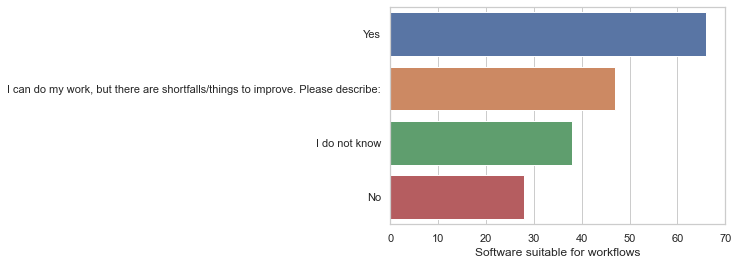

In [161]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q18", order = df['Q18'].value_counts().index)

countplot.set(xlabel="Software suitable for workflows", ylabel="", xlim=(0,70))
#sns.despine(trim=True)


plt.show()

### Q19: Are you working with ontologies (e.g., CIDOC CRM) or other methods of knowledge representation?

In [162]:
#Q19
df['Q19'].value_counts(sort=True)

No. Please explain why:    117
Yes                         57
Name: Q19, dtype: int64

**Please explain why:** i'm not sure; not relevant in these particular cases, in other cases we use relevant standards (but never cidoc crm); im in tech not archive - not sure on their processes; planned, but not yet implemented; not sure; dont have time or capacity; not needed; never heard of it (i just googled it now); lack of staff and technical resources; not my working field within the museum; never heard of them; cause my institution has not gotten to the point of identifying and purchasing the software; i dont know it; partial use only; i am not in charge with documentatation work, so dont have access to the programme; we have created our own system; need new one based on a new philosophy; i dont know what those things are; insufficient resources; no. had no idea what cidoc crm was/is; i dont understand what this is; lack of staff - we have no paid staff; lack of staff; small local authority run museum and art gallery means our it infrastructure is run by the authority and is therefore very regulated and limited as to what we can use; not sure what this means. we use a thesaurus to ensure consistent terms across database; i'm not sure what this refers to; unsure of what this is, not in my department; lack of skills/training; resources and time to implement - plus lack of support from some colleagues and management; don't even know what that is; not come across these; unsure - we have a small collection; not applicable; I am unsure if tracks uses any particular methodology; while i'd love to do so, none of my collaborators here at this institution are familiar with these ontologies with enough familiarity that implementing them is impractical at this point in time; don't know what these are; i don't know what this is; no need; i do not know; no capacity or knowledge; don't know; not familiar; not in our purview (on campus); no need; no need; i do not know; i don't know why; no need; no idea; not even sure what this means; we have no capacity; because i don't know what they are; not part of my role; our cms is only used in house due to historical practices we have several datasets that are not compatible with each other as historically curators maintained datasets separately with modes for ms dos. these datasets were not networked. their structures are not entirely compatible between datsets and a huge abount of time willl be needed to clean the datasets to make them compatible and then unify to one dataset. we have managed to unify several datasets. due tolack of funding and staff we do not have the capacity to complete this in a short period; no idea what that means; never heard of it; lack of knowledge; i don't know what that is; not my role/department; as far as I know, these exist but not discussed with occasional users of software; lack of knowledge about what they are; no need; not sure what that is; not part of the work i do (exhibitions)  

In [163]:
#Count number of participants who have not answered the question
count = df["Q19"].isna().sum()
print(count, "participants have not answered.")

92 participants have not answered.


In [164]:
df['Q19'].value_counts(sort=True, normalize=True) * 100

No. Please explain why:    67.241379
Yes                        32.758621
Name: Q19, dtype: float64

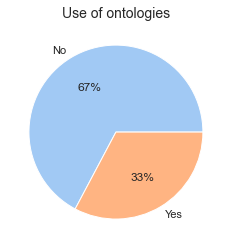

In [165]:
q19 = df['Q19'].value_counts(sort=True)

#define data
data = q19
labels = ['No', 'Yes']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Use of ontologies", fontsize=14)
plt.show()

### Q20: Do you think current databases are suitable to describe museum information and knowledge?

In [166]:
#Count answers and sort descending
df['Q20'].value_counts(sort=True)

Somehow, but needs improvement. Please describe:    51
Yes, suitable                                       50
I do not know                                       41
No, they are not suitable. Please describe:         21
Name: Q20, dtype: int64

**Somehow, but needs improvement. Please describe:** better round-tripping so you can improve records outside the system than re-import updated records sensibly; they must be more practic and have to be get bigger; brittle architecture and simplistic understanding of knowledge makes our tools outdated and reinforce certain cultural hierarchies; the ones we use tend to be incompatible with a conceptual reference model without much abstraction or transformation; better usability; there are plenty of different tools for different museum function, this complicates the digital environment; they don't map easily to the cidoc event-driven model and their data models are often sub-optimal, having evolved over years or decades and they're seldom built with interoperability in mind; needs rationalising: nhm currently working on requirements for new collections mgmt system and associated data model; again, too complex, too many different usages from different users, so data becomes not equally modelled; system does not provide flexibility of data; there are so many models / ontologies that you need a lot of expertise and knowhow to pick and assemble them; current database is basic. it needs to move more on to the ai, but technology change must go in hand of staff training, which is not usually the case; more flexibility and user-friendly language; lack of support for cross-domain materials that straddle museums and other institutions. no (or very little) ai capabilities; needs to be more accessible and more connected to other data nationally and internationally; they need to allow for more nuance, especially regarding Event description and cataloging; manage better relationships between analogue objects and digital representations; in the main but increasingly they do not allow for multiple interpretations or viewpoints - or recording/marking of outdated data which may still provide useful research information; not always easy to retrieve information and present professionly snd eadily for visitor engagement; not intuative or user friendly for non-museum staff; better schemas and ontologies. better collaboration; it's not always easy to search for past attributions of artworks. also it's hard to search for artworks that are of unknown authorship; api and cross platform accessibility is lacking; i've just started getting into graph databases, and i imagine that is how things really relate in a museum; they are limited in what they can store and how they can be accessed; most of them are not flexible; they lack certain locations and access for information; accessibility; can be cumbersome to use; they are suitable, but development needs to respond more quickly to both technological and societal changes. small organisations rely heavily on cms providers, as we simply don't have the in-house staff time and expertise; needs better image asset management; better networks, faster, easier to use; institutions are still discovering the needs behind data collection; 3d replication, compatibility with email, it skills amongst our public (eg elderly without good computer knowledge); better metadata and interoperability; current system is inadequate, for ux reasons, and missing data that would inform interpretive work; need to be able to integrate digital elements e.g. video, audio files, and to be able to store tangential information about collection objects (and link them to other items in the collection more easily); the database we use includes all areas of the permanent collection, which aids researchers

In [167]:
#Count number of participants who have not answered the question
count = df["Q20"].isna().sum()
print(count, "participants have not answered.")

103 participants have not answered.


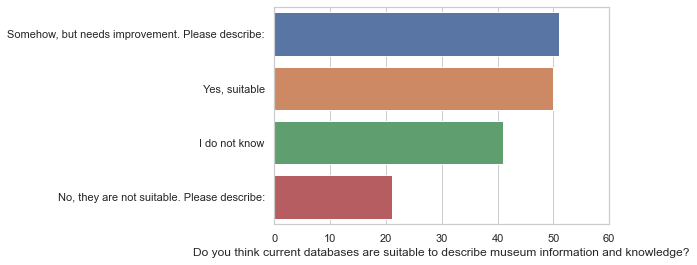

In [168]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q20", order = df['Q20'].value_counts().index)

countplot.set(xlabel="Do you think current databases are suitable to describe museum information and knowledge?", ylabel="", xlim=(0,60))
#sns.despine(trim=True)


plt.show()

### Q21: Does your museum employ a data scientist?

In [169]:
#Count answers and sort descending
df['Q21'].value_counts(sort=True)

No                    128
Yes, 1-5               19
I do not know          14
Used to employ one      2
Yes, 6+                 2
Name: Q21, dtype: int64

In [170]:
#Count number of participants who have not answered the question
count = df["Q21"].isna().sum()
print(count, "participants have not answered.")

101 participants have not answered.


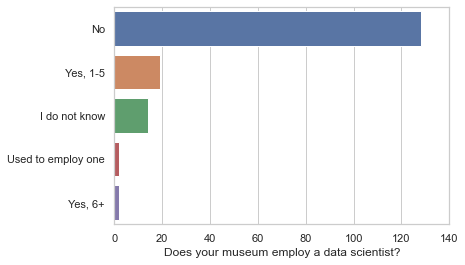

In [171]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q21", order = df['Q21'].value_counts().index)

countplot.set(xlabel="Does your museum employ a data scientist?", ylabel="", xlim=(0,140))
#sns.despine(trim=True)


plt.show()

### Q22: Does your museum employ a dedicated AI engineer/machine learning specialist?

In [172]:
#Count answers and sort descending
df['Q22'].value_counts(sort=True)

No               144
I do not know     10
Yes, 1-5           9
Name: Q22, dtype: int64

In [173]:
#Count number of participants who have not answered the question
count = df["Q22"].isna().sum()
print(count, "participants have not answered.")

103 participants have not answered.


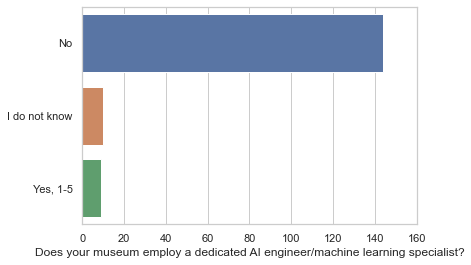

In [174]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q22", order = df['Q22'].value_counts().index)

countplot.set(xlabel="Does your museum employ a dedicated AI engineer/machine learning specialist?", ylabel="", xlim=(0,160))
#sns.despine(trim=True)


plt.show()

### Q23: Do you think there is a dissonance between the actual daily use of technology in museums and its perception by the senior leadership team (those are people who make strategic decisions in your institution)?

In [175]:
#Q23 count answers and sort descending
df['Q23'].value_counts(sort=True)

Yes, there is a dissonance                  53
I do not know                               46
Sometimes, depending on the application     42
No, SLT and daily operations are aligned    19
Name: Q23, dtype: int64

In [176]:
#Count number of participants who have not answered the question
count = df["Q23"].isna().sum()
print(count, "participants have not answered.")

106 participants have not answered.


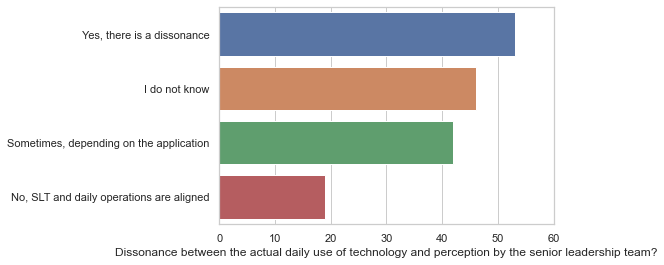

In [177]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q23", order = df['Q23'].value_counts().index)

countplot.set(xlabel="Dissonance between the actual daily use of technology and perception by the senior leadership team?", ylabel="", xlim=(0,60))
#sns.despine(trim=True)


plt.show()

### Q24: In your own words, what kind of tasks in museums can be supported by AI in the future?

**Free text answers:** improvement of the visitors' experience but also possibly improvement of collection inventory; serving audiences, storing information, coordination of technical issues; better access to collections - improved discoverability would support creative and research uses; by the current pandemic cituation will change some conventional practices such group guidance. therefore personel guidance which is provided by smart phones or dedicaten utilites and well-engineered virtual museums shall be the focal point future museums; work with visitors (educational and inclusive projects, guided tours). collection management, curating of exhibitions; visitor counting, image pattern recognition, text prediction; collection discovery and access; in terms of collection classification, analysis, and study i think there are a lot of opportunities to provide a base level of data/visual analysis to be considered alongside more traditional approaches; tasks to improve interaction with visitors; interconnecting different data sources, augmenting data (entity recognition etc.), providing richer interfaces through data integration and mapping, (semi-)automating cataloguing / indexing of objects; greater access to collections; dont see the relevance at present; i have absolutely no idea! we are a very small museum, and ai is not a subject i am proficient in; sentiment analysis for visitor comments. analysis of visitor movement around spaces. chatbots online. exhibitions reaearch; image recognition, taxanomic equivalence analysis, trend analysis and predictive modelling of building/ conservation/ energy/ collections/ online visitor data; very little, museums require human interaction, empathy, emotion and knowledge that requires intuitive context. i don't believe that can be achieved by ai; suggesting content that may be of interest based on previous searches (including images searched, as well as text); exhibits, storing data etc.; collection database, visitor services, address database, website search, social media; presentation, indexing; besides enhancing the visitor journey and experience, it could be more used within visitor data analysis and ticketing; games especially, digitalisation and alternate user experiences; visitor analysis;display enhancement/interaction; ai can help in the documentation and also in the creation of virtual exhibitions; bringing objects to live to share information about the object whilst viewing the object and a more layered representation of our audiences and how they have changed over time; metadata improvement and metadata enhancement, linking collections, analysing visitor data, monitoring and improving energy use in the building and of storage systems. the list can go on :); visitor engagement, relevance in terms of education and mitigate social conflict; data collection etc - we are all volunteers in our small museum and ai is a long way along for us; all museum management: from collections data to public interests and needs; to enhance children interest; it seems very farfetched from my standpoint to do any such suggestions since my institution doesnt use modern technology at all; automation of describing museum objects (and information retrieval more generally), prognosing the condition and needs of an object, curating, help with selection of the digitally born museum objects (etc, i think there are many opportunities); collections management, visitor engagement,  museum management; a searching tool of specimens, like museum's data archives; outreach, collection management, conservation records, movement of items; i think ai technology can be supported for most of museums in near future; registration of  the museum collection; adapting tour content for the visitor, helping to analyze similar items in collections; guide for visitors; nothing; you tell me; answer questions about objects from visitors / tell object stories and learn to adapt the stories following staff or visitor intervention / accessibility options - audio descriptions? bsl interpretation?; collections management and description; integration of museum collections and non-museum collections; search capabilities (including multilingual and transmedia); visitor experience, auto-creating metadata from digitised objects; customer service queries; really couldn't say. one part time member of staff trying to meet the day-to-day tasks and requests, so ai has never been a consideration; enrichment of collections for search, exploration, and discovery; integration into a national collections database; I do not know - my knowledge in this area is awful; not sure; supporting further access to museum collections not currently on display.  puttin the museum experience in competition with other virtual/online experiences. ensuring we are offering the best experience to our visitors. further opportunity for engagement and interpreting collections; smart search, keyword networks; i do not know; generating user/customer insights from our data to improve our offer both on-site and online (assist with planning & decision making in the short - mid term), help us generate insights to drive our longer term strategic direction/focus; potential to help enhance our on-site visitor experience; in my department, image tagging and searchability; i do not know; pretty much every aspect of museum work could benefit from ai; image identification/ cataloguing, documents research, better interpretation, wider access; data management, interpretation, visitor engagement; i actually have no idea; precise marketing, location services, general information and curation info; do not know enough about it; interpretation and engagement; searches for quick access to information that has been previously provided by a human; visitor engagement, collections access; interpretation, research, data analysis, exhibitions, marketing etc; better ocr, indexing and crss referencing of registers, publications, field notebooks, etc; collections management, interactive exhibits, data analysis, research with other organisations; dynamically presented content based on user input (put in a knowledge interest, heritage, favorite and get recommendations on a personalized experience); museum education, documentation, public relation; visitor experience, education, engagement work. metadata enhancement with museum collections has proven too difficult/diverse for classification models to scale or prove useful; widening access to collections data; transcription, translation, datamining; showing how machines worked that no longer work; our collections will be more valuable to researchers; spatial analysis of biological collections for determining species range changes due to environmental changes; unsure; exhibitions and objects could be 'brought to life'; this v much depends on (a) what you mean by ai, (b) who is developing the technology, (c) understanding the ethics of ai and the algorithms used; to make an impression to visitors; collect statistics, prepare annual reports, perform work that does not require creativity; all sorts, from visitor experience to collections management; data input, indexing, making connections between disparate areas; observing the footfall of guests, monitering how they interact with exhibits, organising collections into a usable searchable useful system; in my eyes museum are asked to be more democratic and bring audiences that do not see museums as cultural destinations. there for there is a need to create routes and games for these target groups . ai should support these trails; certain collections management tasks; there is a difference between could and should. many "coulds", but at the moment I want to see good, unbiased, helpful results first. until then: humans!; i do not think AI can support any museum tasks in future; data wrangling as well as engagement; creating connections between objects, people and places that might not be spotted by humans; virtual tours, answering simple queries; no idea; data mapping/connecting; educational engagement; collections management, interpretation, public engagement, public programming; no idea; regulation of humidity, temperature in exhibition spaces, marketing and promotion activities; grouping of audiences and visitors, content provision, collection management, attendance prediction, usage prediction, interaction with objects; sharing objects,presenting them in different ways; collections and archive access and interoperability; learning about user preferences to better serve visitors; making links between objects, helping with enquiries; i think visitor analysis/prediction and tidying or maintaining records will become standard practice; ai is tricky relative to privacy. it also, in present applications, seems to make assumptions about users' interests. when doing research in history museums, it would be hard to justify that forced direction compared to individual discovery. there are pluses and minuses to both. perhaps that's part of the ai development today; not sure; customized tours, traffic flow analysis, restoration, energy savings; audience datas, technology for animations; i think i'm not even aware of all the possibilities; conservation of artifacts

In [178]:
#Count number of participants who have not answered the question
count = df["Q24"].isna().sum()
print(count, "participants have not answered.")

157 participants have not answered.


### Q25: Please indicate below - ranging from 'not at all' to 'very much' - if in your view AI technologies are generally negatively impacted by:

In [179]:
#Q25 plot trial
df[['Q25_1','Q25_2','Q25_3','Q25_4','Q25_5','Q25_6', 'Q25_7']].head()

,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7
0,0.0,1.0,0.0,3.0,0.0,3.0,0.0
1,2.0,3.0,2.0,4.0,2.0,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,3.0,2.0,3.0,3.0,3.0,NaN
4,4.0,4.0,0.0,3.0,3.0,2.0,NaN


In [180]:
#Fit all answer columns related to Q25 into one column
q25_melt = pd.melt(df, id_vars=['ResponseId'], value_vars=['Q25_1','Q25_2','Q25_3','Q25_4','Q25_5','Q25_6', 'Q25_7'], var_name='Q25', value_name='scores')

q25_melt

,ResponseId,Q25,scores
0,R_3gZ7aApg5ysFqf8,Q25_1,0.0
1,R_Us8dd0u8MtesCHf,Q25_1,2.0
2,R_12EIR7qN1jaSgpl,Q25_1,NaN
3,R_8zVbFGd4kxIMw7v,Q25_1,4.0
4,R_3iy6fcVREMEHWMo,Q25_1,4.0
...,...,...,...
1857,R_129LylbO85n1E4O,Q25_7,NaN
1858,R_3FPuAZXjPSSeqIi,Q25_7,NaN
1859,R_27HHLVj8Pif46bc,Q25_7,NaN
1860,R_RUqvCt83jLEBSIV,Q25_7,NaN


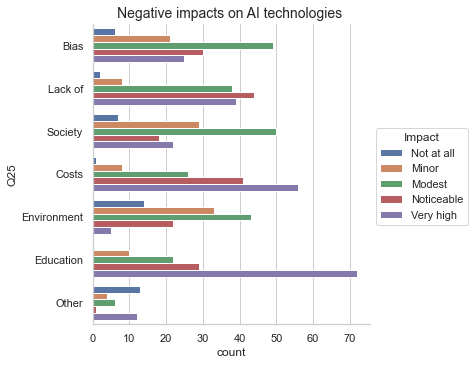

In [181]:
#plot the melt column with counted answers and legend representing the impact factor
p = sns.catplot(y='Q25', hue='scores', kind='count', data=q25_melt, legend=False)
p.set_yticklabels(['Bias', 'Lack of', 'Society', 'Costs', 'Environment', 'Education', 'Other'])
plt.legend(title='Impact', labels=['Not at all', 'Minor', 'Modest', 'Noticeable', 'Very high'], bbox_to_anchor=(1.00,0.67))
plt.title("Negative impacts on AI technologies ", fontsize=14)
plt.show()

### Q26: How much impact do the below variables have on the uptake of AI applications in museums?

In [182]:
#Q26 plot trial
df[['Q26_1','Q26_2','Q26_3','Q26_4','Q26_5','Q26_6', 'Q26_7', 'Q26_8', 'Q26_9']].head()

,Q26_1,Q26_2,Q26_3,Q26_4,Q26_5,Q26_6,Q26_7,Q26_8,Q26_9
0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0
1,4.0,4.0,3.0,2.0,3.0,2.0,1.0,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,3.0,3.0,NaN,NaN,NaN,1.0,NaN
4,4.0,4.0,4.0,4.0,2.0,NaN,0.0,0.0,NaN


In [183]:
#Fit all answer columns related to Q26 into one column
q26_melt = pd.melt(df, id_vars=['ResponseId'], value_vars=['Q26_1','Q26_2','Q26_3','Q26_4','Q26_5','Q26_6', 'Q26_7', 'Q26_8', 'Q26_9'], var_name='Q26', value_name='scores')

q26_melt

,ResponseId,Q26,scores
0,R_3gZ7aApg5ysFqf8,Q26_1,3.0
1,R_Us8dd0u8MtesCHf,Q26_1,4.0
2,R_12EIR7qN1jaSgpl,Q26_1,NaN
3,R_8zVbFGd4kxIMw7v,Q26_1,4.0
4,R_3iy6fcVREMEHWMo,Q26_1,4.0
...,...,...,...
2389,R_129LylbO85n1E4O,Q26_9,NaN
2390,R_3FPuAZXjPSSeqIi,Q26_9,NaN
2391,R_27HHLVj8Pif46bc,Q26_9,NaN
2392,R_RUqvCt83jLEBSIV,Q26_9,NaN


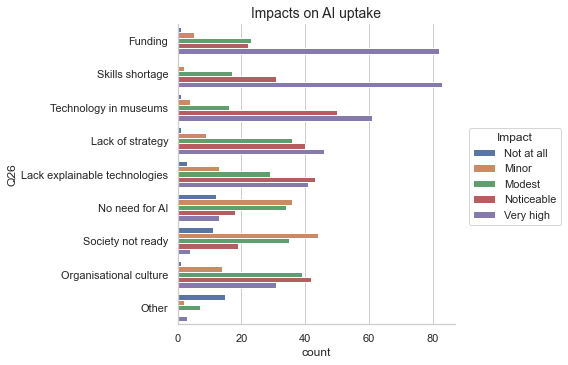

In [184]:
p = sns.catplot(y='Q26', hue='scores', kind='count', data=q26_melt, legend=False)
p.set_yticklabels(['Funding', 'Skills shortage', 'Technology in museums', 'Lack of strategy', 'Lack explainable technologies', 'No need for AI', 'Society not ready', 'Organisational culture', 'Other'])
plt.legend(title='Impact', labels=['Not at all', 'Minor', 'Modest', 'Noticeable', 'Very high'], bbox_to_anchor=(1.4,0.67))
plt.title("Impacts on AI uptake", fontsize=14)
plt.show()

### Q27: Which of the following would favour the uptake of AI in museums?

In [185]:
#Q27 plot trial
df[['Q27_1','Q27_2','Q27_3','Q27_4','Q27_5','Q27_6']].head()

,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q27_6
0,3.0,3.0,4.0,3.0,0.0,0.0
1,5.0,4.0,4.0,2.0,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,5.0,1.0,1.0,NaN
4,4.0,5.0,5.0,2.0,5.0,NaN


In [186]:
#Fit all answer columns related to Q27 into one column
q27_melt = pd.melt(df, id_vars=['ResponseId'], value_vars=['Q27_1','Q27_2','Q27_3','Q27_4','Q27_5','Q27_6'], var_name='Q27', value_name='scores')

q27_melt

,ResponseId,Q27,scores
0,R_3gZ7aApg5ysFqf8,Q27_1,3.0
1,R_Us8dd0u8MtesCHf,Q27_1,5.0
2,R_12EIR7qN1jaSgpl,Q27_1,NaN
3,R_8zVbFGd4kxIMw7v,Q27_1,5.0
4,R_3iy6fcVREMEHWMo,Q27_1,4.0
...,...,...,...
1591,R_129LylbO85n1E4O,Q27_6,NaN
1592,R_3FPuAZXjPSSeqIi,Q27_6,NaN
1593,R_27HHLVj8Pif46bc,Q27_6,NaN
1594,R_RUqvCt83jLEBSIV,Q27_6,NaN


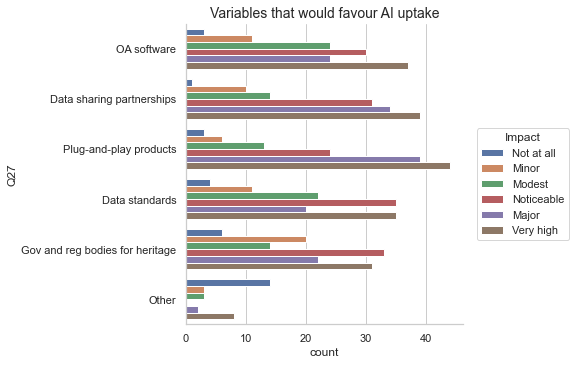

In [187]:
p = sns.catplot(y='Q27', hue='scores', kind='count', data=q27_melt, legend=False)
p.set_yticklabels(['OA software', 'Data sharing partnerships', 'Plug-and-play products', 'Data standards', 'Gov and reg bodies for heritage', 'Other'])
plt.legend(title='Impact', labels=['Not at all', 'Minor', 'Modest', 'Noticeable', 'Major', 'Very high'], bbox_to_anchor=(1.4,0.67))
plt.title("Variables that would favour AI uptake", fontsize=14)
plt.show()

### Q28: Are museums suitable institutions to educate the general public about AI technologies and its ethical implications?

In [188]:
#Q28 count answers and sort descending
df['Q28'].value_counts(sort=True)

Yes              100
I do not know     26
No                16
Name: Q28, dtype: int64

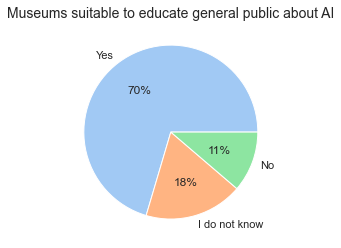

In [189]:
q28 = df['Q28'].value_counts(sort=True)

#define data
data = q28
labels = ['Yes', 'I do not know', 'No']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Museums suitable to educate general public about AI", fontsize=14)
plt.show()

In [190]:
#Count number of participants who have not answered the question
count = df["Q28"].isna().sum()
print(count, "participants have not answered.")

124 participants have not answered.


### Q29: What best describes your current job role?

In [191]:
#Q29
q29 = df['Q29'].value_counts(sort=True)
q29

Curatorial                            34
Other (please describe):              29
Leadership/strategic                  28
Digital/technical                     26
Research                              11
Collection Management and Registry    11
Conservation/Restoration               2
Name: Q29, dtype: int64

**Other (please describe):** supervising and control of urban excavations througout the city of istanbul; used to be exhibition project manager; communication; curator working with people, not objects; cooperation with museums; eu project leader; educator; learning and access; all of the above apart from conservation/restoration; learning and engagement; small museum (4 fte staff) so all of the above!; collections; curatorial and learning and engagement

In [192]:
#Count number of participants who have not answered the question
count = df["Q29"].isna().sum()
print(count, "participants have not answered.")

125 participants have not answered.


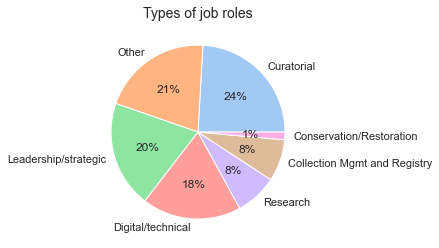

In [193]:
#define data
q29 = df['Q29'].value_counts(sort=True)
data = q29
labels = ['Curatorial', 'Other', 'Leadership/strategic', 'Digital/technical', 'Research', 'Collection Mgmt and Registry', 'Conservation/Restoration']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Types of job roles", fontsize=14)
plt.show()

### Q30: How long for have you been working in the museum sector?

In [194]:
#Q30 count answers and sort descending
q30 = df['Q30'].value_counts(sort=True)
q30

> 15 years     45
5-10 years     39
1-4 years      29
11-15 years    28
Name: Q30, dtype: int64

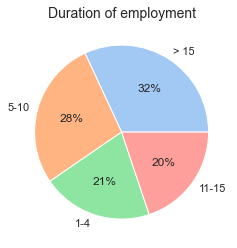

In [195]:
#define data
q30 = df['Q30'].value_counts(sort=True)
data = q30
labels = ['> 15', '5-10', '1-4', '11-15']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Duration of employment", fontsize=14)
plt.show()

In [196]:
#Count number of participants who have not answered the question
count = df["Q30"].isna().sum()
print(count, "participants have not answered.")

125 participants have not answered.


### Q31: In which country is the institution you are working for based? Multi-site institutions please indicate the country your main building is based at.

In [197]:
#Q31 count answers and sort descending
df['Q31'].value_counts(sort=True)

United Kingdom of Great Britain and Northern Ireland    60
United States of America                                24
Austria                                                  7
Japan                                                    6
Turkey                                                   4
Lithuania                                                3
Italy                                                    3
Germany                                                  3
Estonia                                                  2
Israel                                                   2
Netherlands                                              2
Ireland                                                  2
Croatia                                                  2
Belgium                                                  1
Cambodia                                                 1
Canada                                                   1
Mexico                                                  

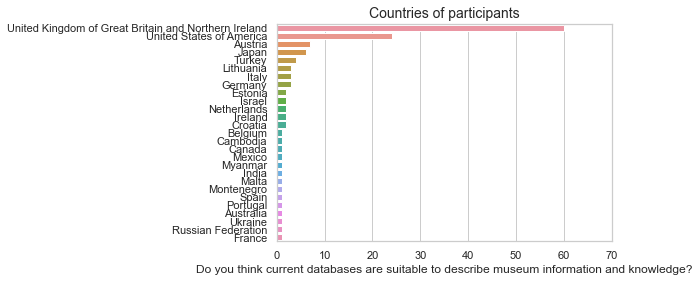

In [198]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q31", order = df['Q31'].value_counts().index)

countplot.set(xlabel="Do you think current databases are suitable to describe museum information and knowledge?", ylabel="", xlim=(0,70))
plt.title("Countries of participants", fontsize=14)



plt.show()

### Q32: What area is the museum you are working for located?

In [199]:
#Q32 count answers and sort descending
q32 = df['Q32'].value_counts(sort=True)
q32

Urban                              55
Capital city                       45
Multi-site, but generally urban    21
Rural                              15
Multi-site, but generally rural     3
Name: Q32, dtype: int64

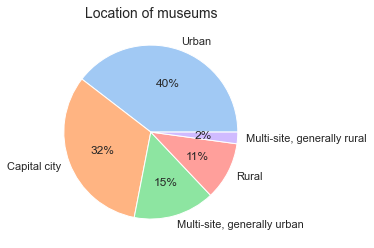

In [200]:
#define data
q32 = df['Q32'].value_counts(sort=True)
data = q32
labels = ['Urban', 'Capital city', 'Multi-site, generally urban', 'Rural', 'Multi-site, generally rural']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Location of museums", fontsize=14)
plt.show()

In [201]:
#Count number of participants who have not answered the question
count = df["Q32"].isna().sum()
print(count, "participants have not answered.")

127 participants have not answered.


### Q33: How many people are working for this institution?

In [202]:
#Q33 count answers and sort descending
q33 = df['Q33'].value_counts(sort=True)
q33

6-15             27
> 200            23
51-100           20
16-30            18
31-50            17
1-5              15
101-200          14
I do not know     5
Name: Q33, dtype: int64

In [203]:
#Count number of participants who have not answered the question
count = df["Q33"].isna().sum()
print(count, "participants have not answered.")

127 participants have not answered.


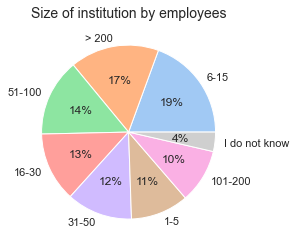

In [204]:
#define data
q33 = df['Q33'].value_counts(sort=True)
data = q33
labels = ['6-15', '> 200', '51-100', '16-30', '31-50', '1-5', '101-200', 'I do not know']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:8]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Size of institution by employees", fontsize=14)
plt.show()

### Q34: What is the approximate annual budget of the institution you are working for? (If not included below, please convert your local currency to British Pound Sterling)

In [205]:
#Q34 count answers and sort descending
q34 = df['Q34'].value_counts(sort=True)
q34

I do not know                                                                 40
£100 000 - £1 000 000 (€117 000 - €1 171 000; $140 000 - $1 400 000)          31
> £5 000 000 (> €5 852 000; > $7 000 000)                                     23
£1 000 000 - £5 000 000 (€1 171 000 - €5 852 000; $1 400 000 - $7 000 000)    18
£26 000 - £100 000 (€35 000 - €117 000; $42 000 - $140 000)                   15
< £25 000 (< €29 000; < $35 000)                                              10
Name: Q34, dtype: int64

In [206]:
#Count number of participants who have not answered the question
count = df["Q34"].isna().sum()
print(count, "participants have not answered.")

129 participants have not answered.


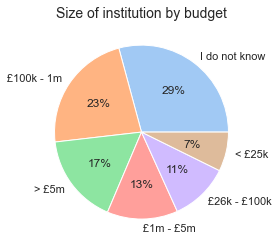

In [207]:
#define data
q34 = df['Q34'].value_counts(sort=True)
data = q34
labels = ['I do not know', '£100k - 1m', '> £5m', '£1m - £5m', '£26k - £100k', '< £25k']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Size of institution by budget", fontsize=14)
plt.show()

### Q35: How many visitors does your institution attract annually? (Please indicate pre-COVID numbers in case your institution was subject to a lockdown)

In [208]:
#Q35 count answers and sort descending 
q35 = df['Q35'].value_counts(sort=True)
q35

< 20 000         30
I do not know    21
< 50 000         21
< 300 000        18
< 500 000        15
< 100 000        13
> 1 000 000      12
< 1 000 000       7
Name: Q35, dtype: int64

In [209]:
#Count number of participants who have not answered the question
count = df["Q35"].isna().sum()
print(count, "participants have not answered.")

129 participants have not answered.


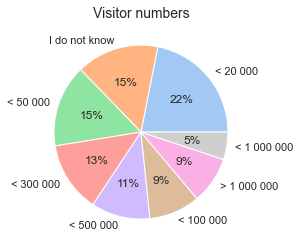

In [210]:
#define data
q35 = df['Q35'].value_counts(sort=True)
data = q35
labels = ['< 20 000', 'I do not know', '< 50 000', '< 300 000', '< 500 000', '< 100 000', '> 1 000 000', '< 1 000 000']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:8]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Visitor numbers", fontsize=14)
plt.show()

### Q36: What type best describes the museum you are working for?

In [211]:
#Q36 count answers and sort descending
df['Q36'].value_counts(sort=True)

Universal (holding a significant amount of various collections; multiple exhibitions with various themes)    40
Art                                                                                                          32
History                                                                                                      27
Other (please define):                                                                                       20
Ethnography                                                                                                   6
Science                                                                                                       6
Natural History                                                                                               5
Name: Q36, dtype: int64

**Other (please define):** 

In [212]:
df['Q36_7_TEXT'].value_counts(sort=True)

Archaeology                        4
I work for multiple museums        2
Monetary and Economic History      1
Archeaology and Etnography         1
Multidisciplinary                  1
Medical                            1
Applied Arts/Design                1
Transport                          1
Culture                            1
Maritime and Industrial            1
We are agency for museum sector    1
Local Authority                    1
Geology                            1
not a museum                       1
Botanical Garden                   1
Name: Q36_7_TEXT, dtype: int64

In [213]:
#Count number of participants who have not answered the question
count = df["Q36"].isna().sum()
print(count, "participants have not answered.")

130 participants have not answered.


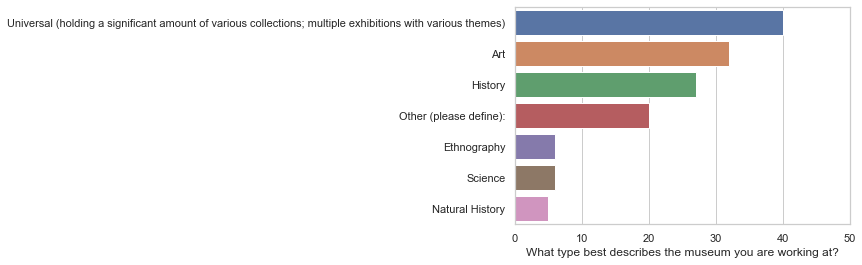

In [214]:
sns.set_theme(style="whitegrid")


countplot = sns.countplot(data=df, y="Q36", order = df['Q36'].value_counts().index)

countplot.set(xlabel="What type best describes the museum you are working at?", ylabel="", xlim=(0,50))
#sns.despine(trim=True)


plt.show()

### Usage of AI according to budget of institution:

/opt/anaconda3/envs/maia-analysis/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


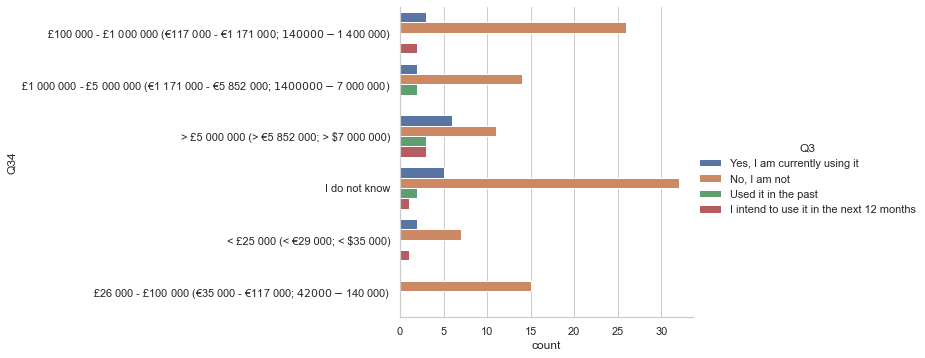

In [215]:
p = sns.catplot(y='Q34', hue='Q3', kind='count', data=df, legend=True)